In [1]:
# Dependencies and Setup
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib


#Load Crimes Data
crimes_csv="Crimes_Incidents_from_2008-2016.csv"
crimes1 = pd.read_csv(crimes_csv)
crimes2 = crimes1.drop(["SHIFT"], axis=1)
#Sum the cnt of crime types
crimes3=crimes2.groupby(['YEAR','NEIGHBORHOOD_CLUSTER','OFFENSE'], as_index=False)[['NUMBER_OF_CRIMES']].sum()
crimes4=pd.DataFrame(crimes3)
Crimes5=crimes4.rename(columns = {'YEAR':'Year', 'NEIGHBORHOOD_CLUSTER':'Cluster'}) 

#Pivot crime data
Crimes_crs=Crimes5.pivot_table( index=['Year',"Cluster"],
                          values=['NUMBER_OF_CRIMES'], columns=['OFFENSE'], aggfunc=sum,margins=True)
c_df=pd.DataFrame(Crimes_crs)
#Replace NaN with 0
c_df_nan=c_df.fillna(0, inplace=True)

#Flaten pivot records and create index
c_df.reset_index(inplace=True)
c_df_tbl = pd.DataFrame(c_df.to_records())
c_df_tbl.columns = ["index","Year","Cluster","ARSON", "ASSAULT W/DANGEROUS WEAPON", "BURGLARY","HOMICIDE",
                       "MOTOR VEHICLE THEFT","ROBBERY","SEX ABUSE","THEFT F/AUTO","THEFT/OTHER","All"]
c_df_tbl = c_df_tbl.drop(["index"], axis=1)

#Pivot created raw and column totals(All). Replace All in Year column
c_df_tbl['Year'] = c_df_tbl['Year'].replace("All", 0)

#c_df_tbl.style.set_caption('Crime Data by Year and Cluster')


In [2]:
#Load Homes Data
homes_csv="dc_housing_all_clean-2008-2016.csv"
h_df = pd.read_csv(homes_csv)
h_df_cln = h_df.drop(["Unnamed: 0"], axis=1)
h_df_all = h_df_cln[['Year', 'Cluster', 'Neighborhoods', 'Median_Price']]

#h_df_all.style.set_caption('Median Price by Year by Cluster')

In [3]:
#Merge datasets
h_n_c = pd.merge(h_df_all, c_df_tbl, on=['Year', 'Cluster'])
#h_n_c.style.set_caption('Combined Table of Crime and Median Price by Year and Cluster')

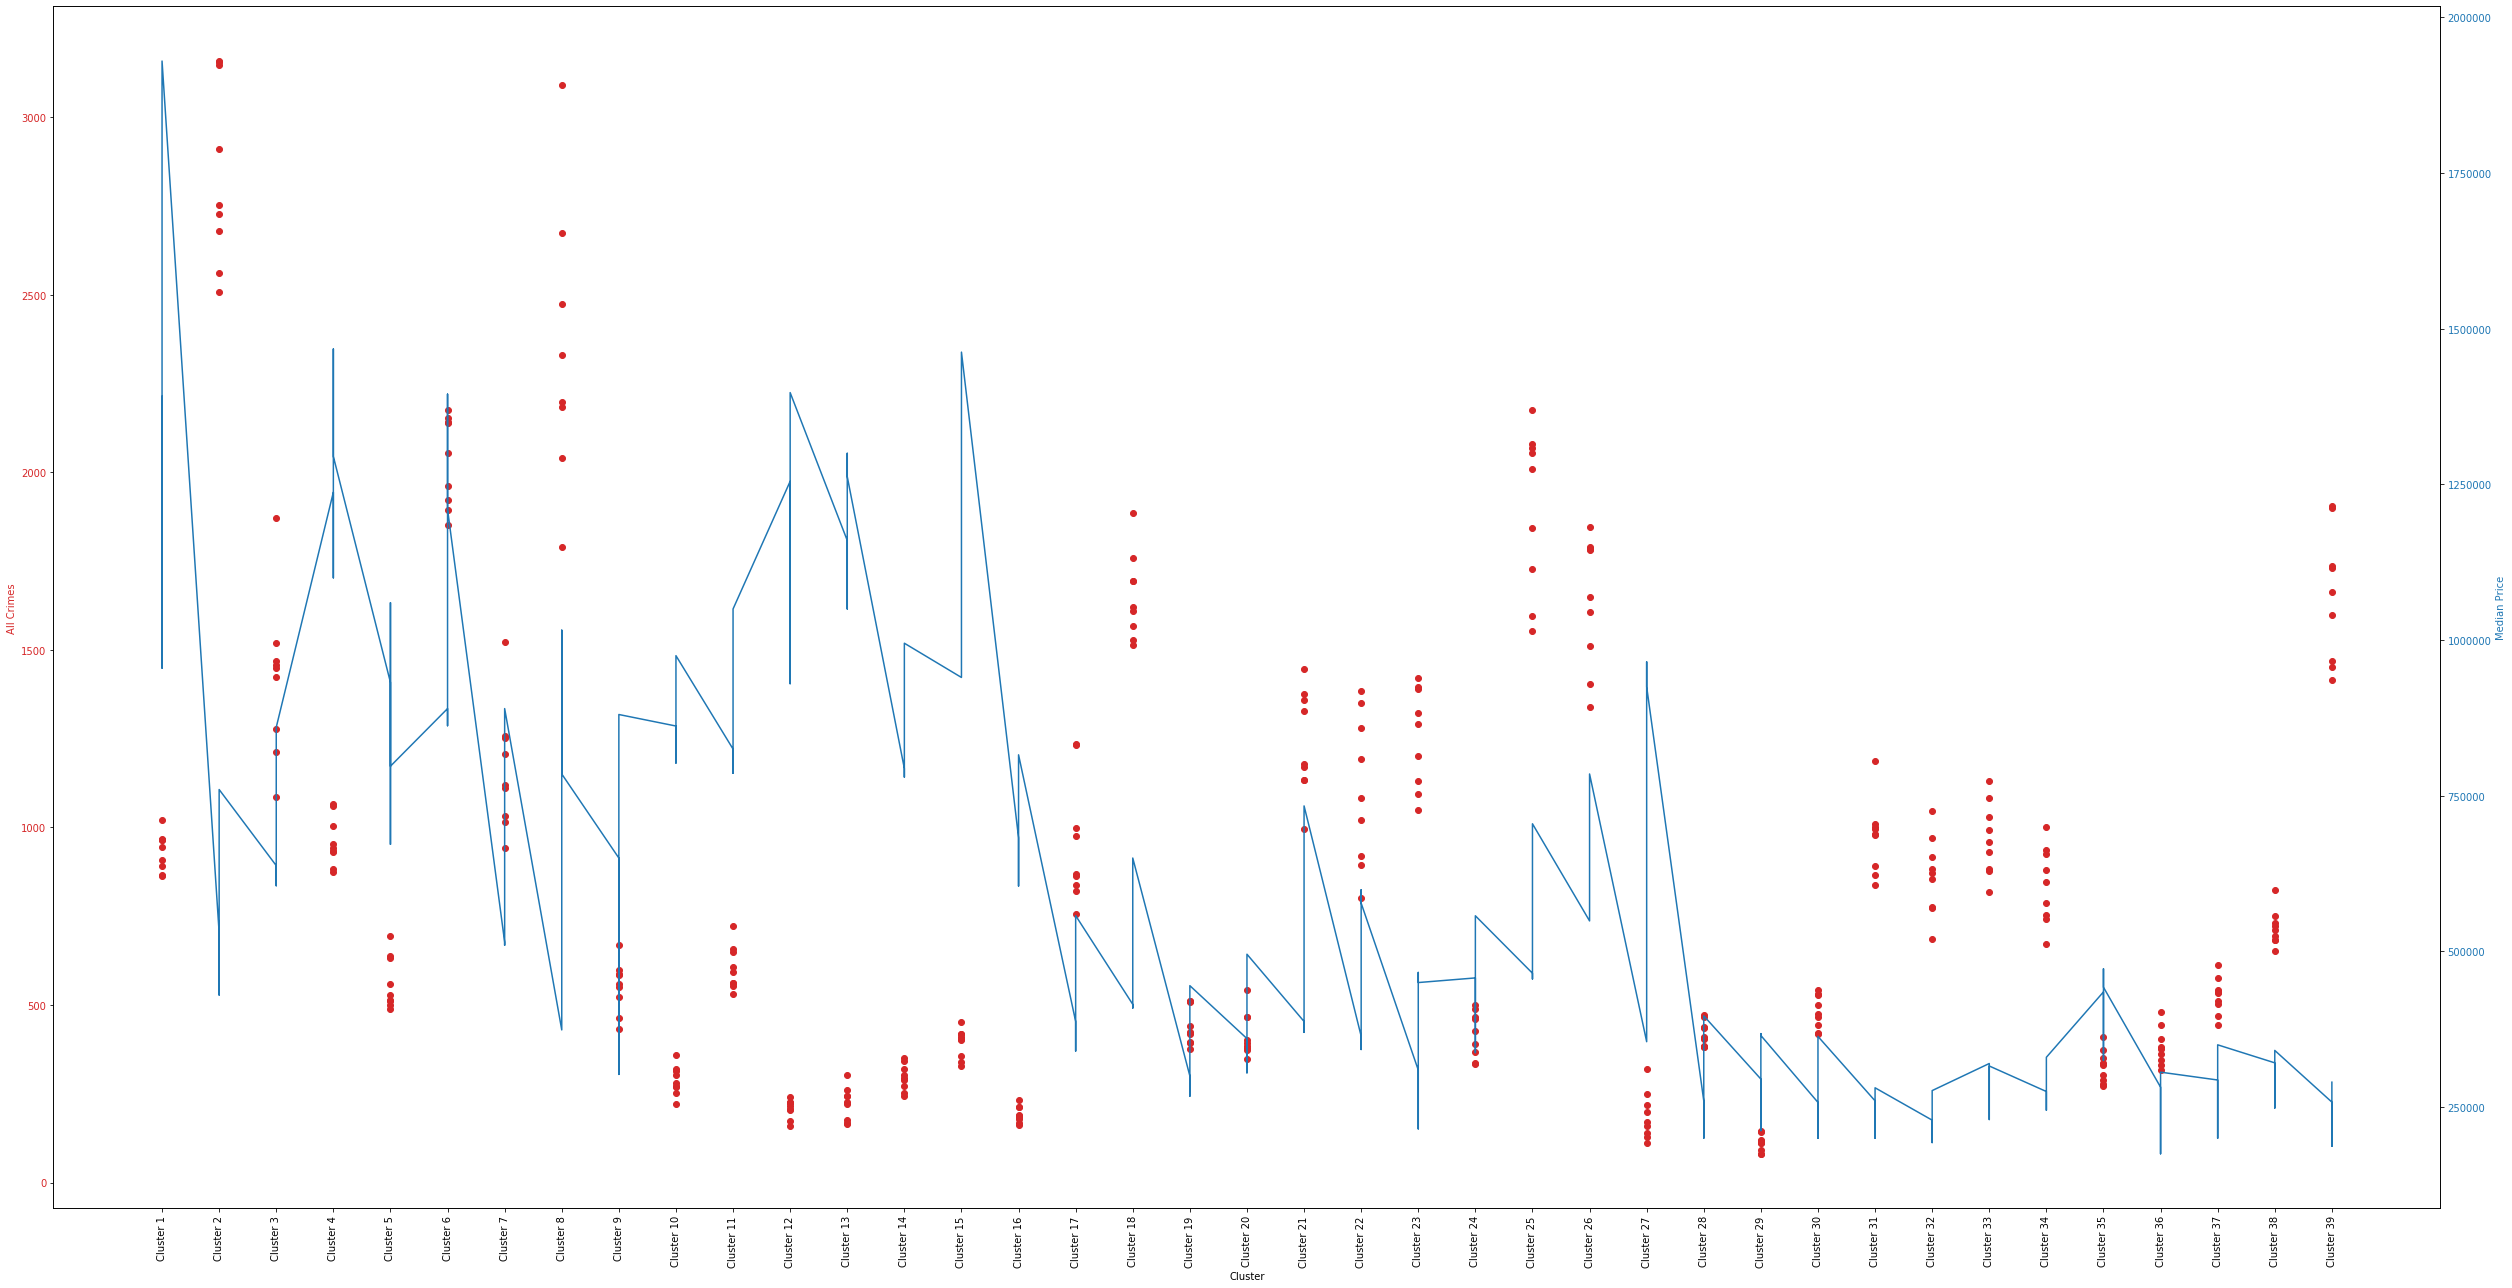

In [4]:
# Fig01 Generate a line scatter/plot for both crimes and price by all clusters

fig, ax1 = plt.subplots(figsize=(35, 18))

color = 'tab:red'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('All Crimes', color=color)
ax1.scatter(h_n_c['Cluster'], h_n_c['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.plot(h_n_c['Cluster'], h_n_c['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


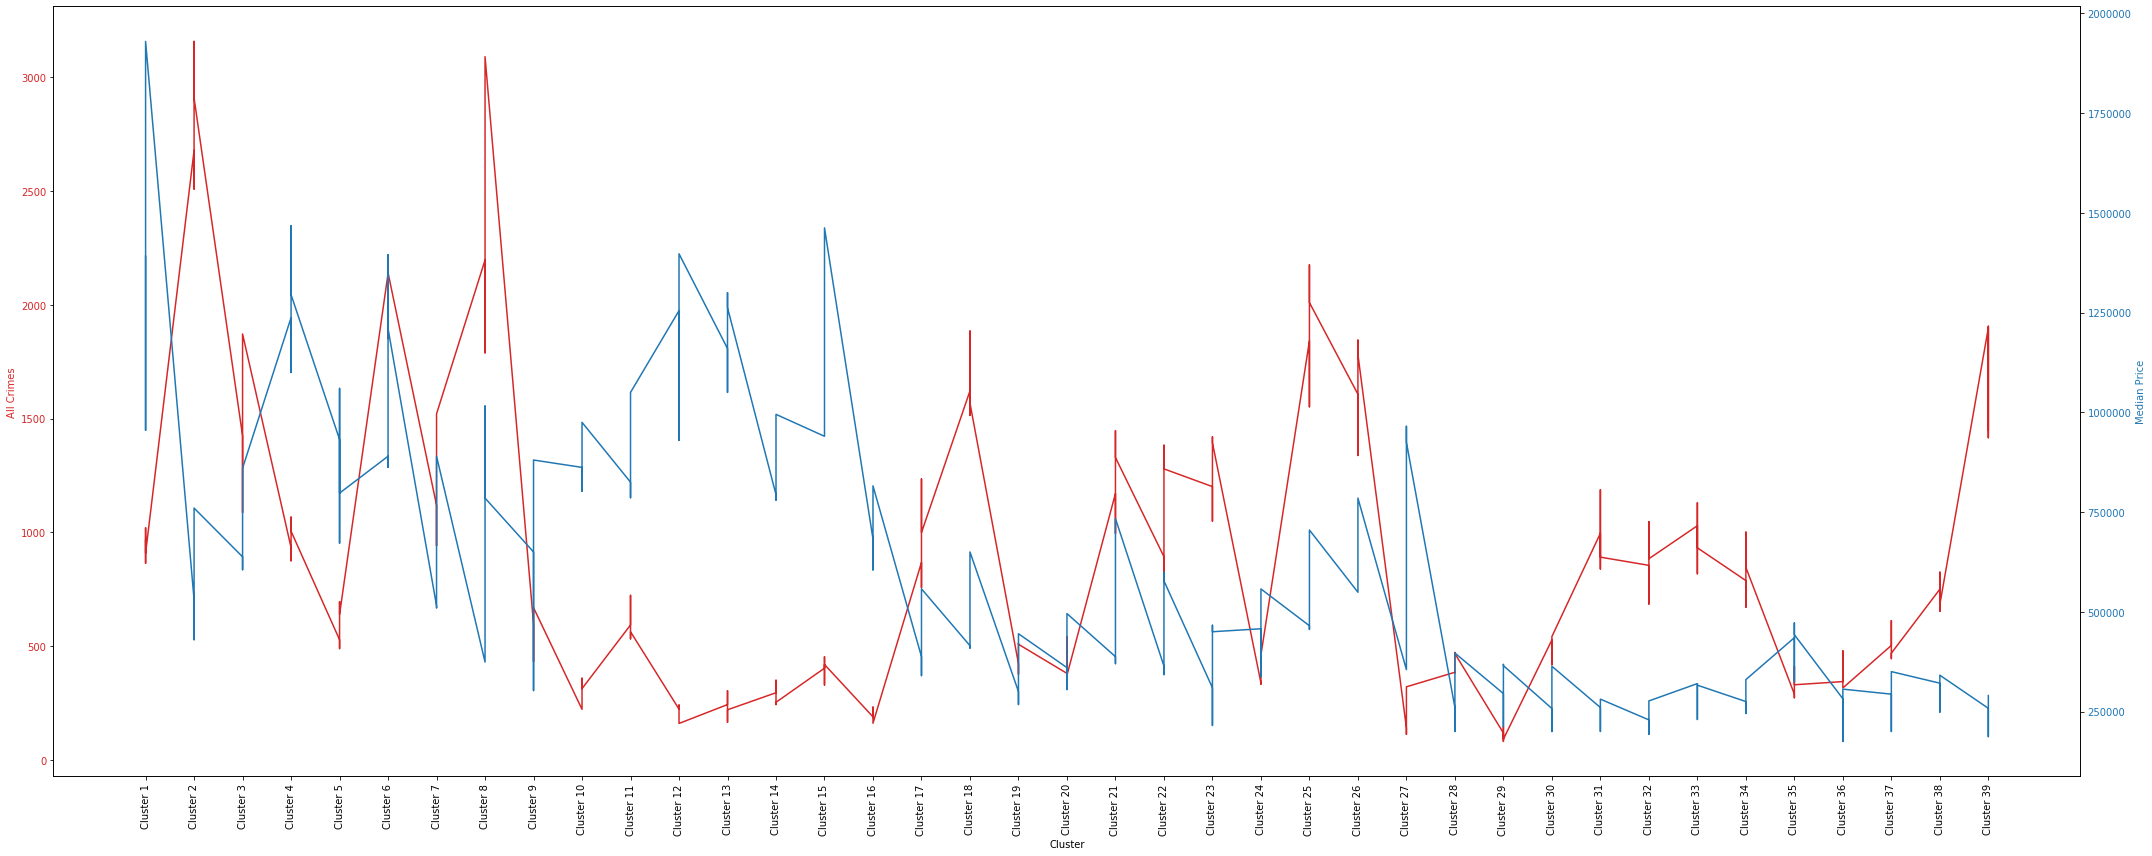

In [5]:
# Fig02 Generate a line scatter/plot for both crimes and price by all clusters. (Choose btn 01 & 02)

fig, ax1 = plt.subplots(figsize=(30, 12))

color = 'tab:red'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('All Crimes', color=color)
ax1.plot(h_n_c['Cluster'], h_n_c['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.plot(h_n_c['Cluster'], h_n_c['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

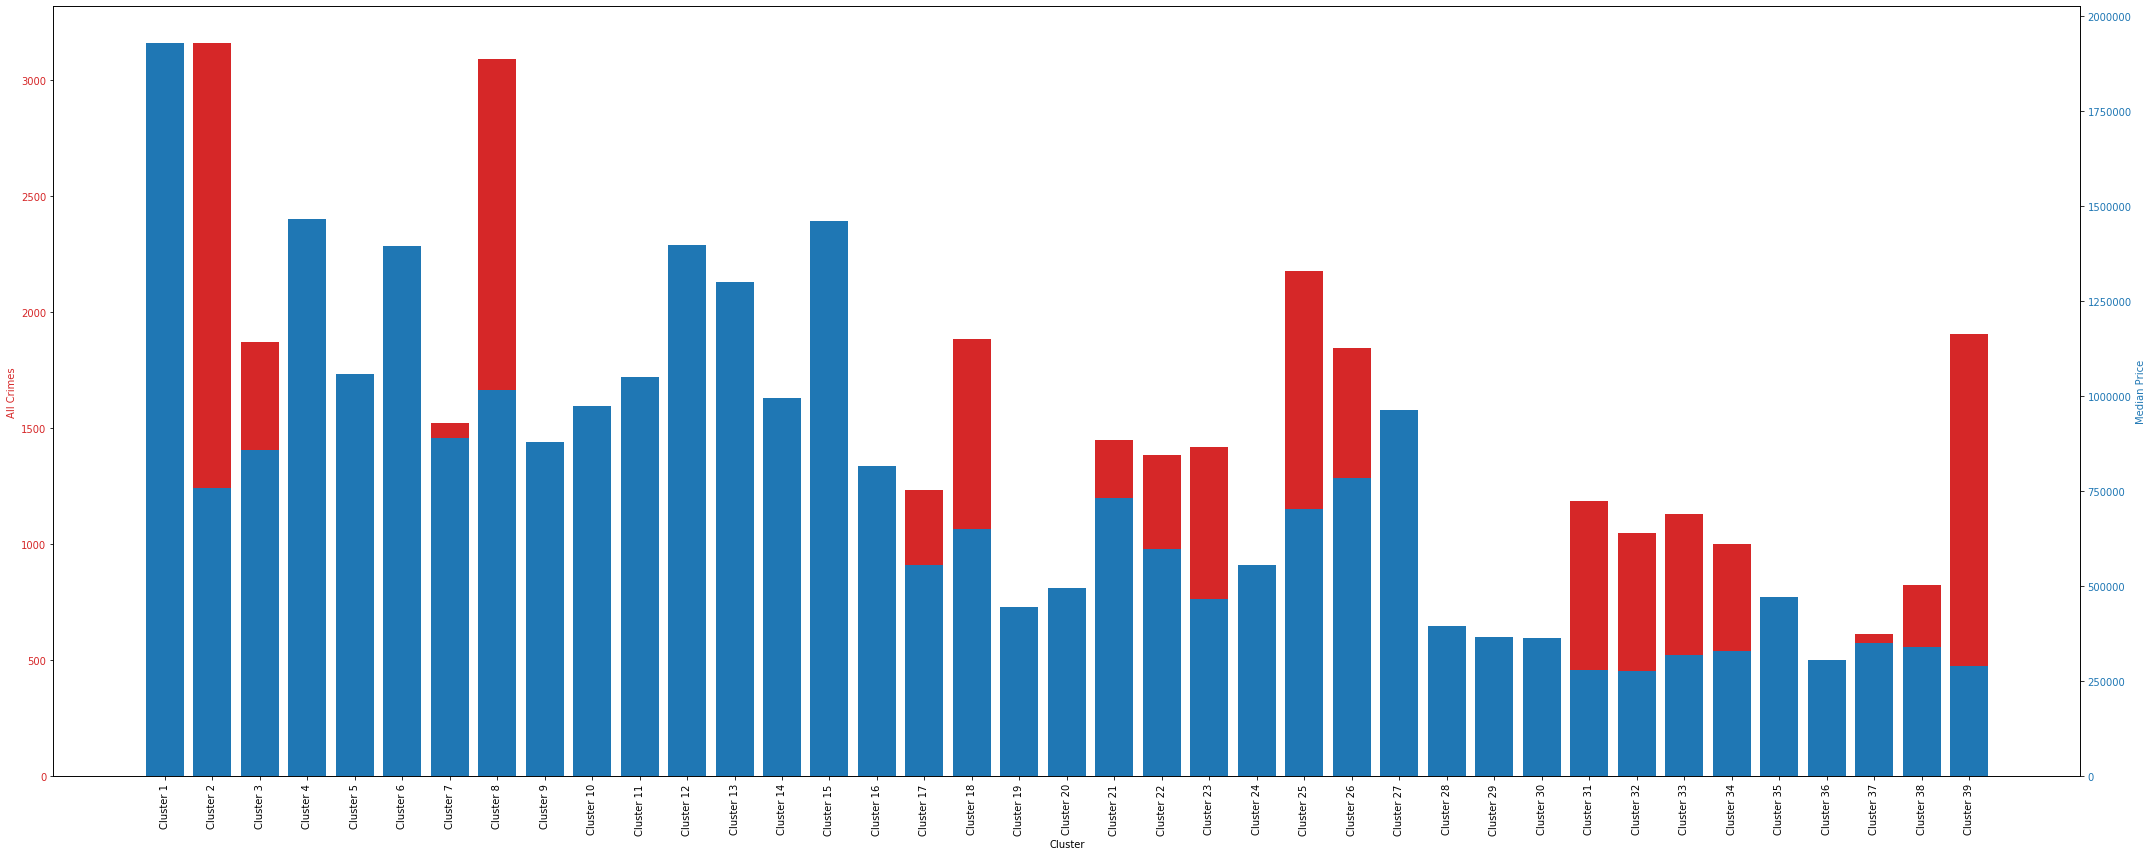

In [6]:
# Fig03 Generate a line bar for both crimes and price by all clusters. (Choose btn 01 & 02 & 03)

fig, ax1 = plt.subplots(figsize=(30, 12))

color = 'tab:red'
ax1.set_xlabel('Cluster')
ax1.set_ylabel('All Crimes', color=color)
ax1.bar(h_n_c['Cluster'], h_n_c['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.bar(h_n_c['Cluster'], h_n_c['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [7]:
#Find correlations between new dataset
crr_df=pd.DataFrame(h_n_c.corr())
crr_df

,Year,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,All
Year,1.000000,0.188957,-0.276125,-0.046576,-0.184909,-0.037255,-0.276984,-0.087796,0.381036,0.362161,0.030892,0.083772
Median_Price,0.188957,1.000000,-0.387428,-0.518194,-0.314466,-0.469367,-0.494346,-0.315869,-0.148635,0.151130,0.221914,-0.011822
ARSON,-0.276125,-0.387428,1.000000,0.610938,0.613979,0.585107,0.660352,0.522764,0.225662,0.039002,0.119540,0.328605
ASSAULT W/DANGEROUS WEAPON,-0.046576,-0.518194,0.610938,1.000000,0.799367,0.780832,0.846345,0.827111,0.658395,0.258525,0.334716,0.623961
BURGLARY,-0.184909,-0.314466,0.613979,0.799367,1.000000,0.600988,0.768907,0.806939,0.503126,0.327725,0.370667,0.657049
HOMICIDE,-0.037255,-0.469367,0.585107,0.780832,0.600988,1.000000,0.708374,0.556726,0.423906,0.055558,0.091321,0.346481
MOTOR VEHICLE THEFT,-0.276984,-0.494346,0.660352,0.846345,0.768907,0.708374,1.000000,0.760542,0.444411,0.165395,0.331745,0.578634
ROBBERY,-0.087796,-0.315869,0.522764,0.827111,0.806939,0.556726,0.760542,1.000000,0.666000,0.546736,0.580127,0.842096
SEX ABUSE,0.381036,-0.148635,0.225662,0.658395,0.503126,0.423906,0.444411,0.666000,1.000000,0.621661,0.538678,0.729905
THEFT F/AUTO,0.362161,0.151130,0.039002,0.258525,0.327725,0.055558,0.165395,0.546736,0.621661,1.000000,0.604162,0.794860


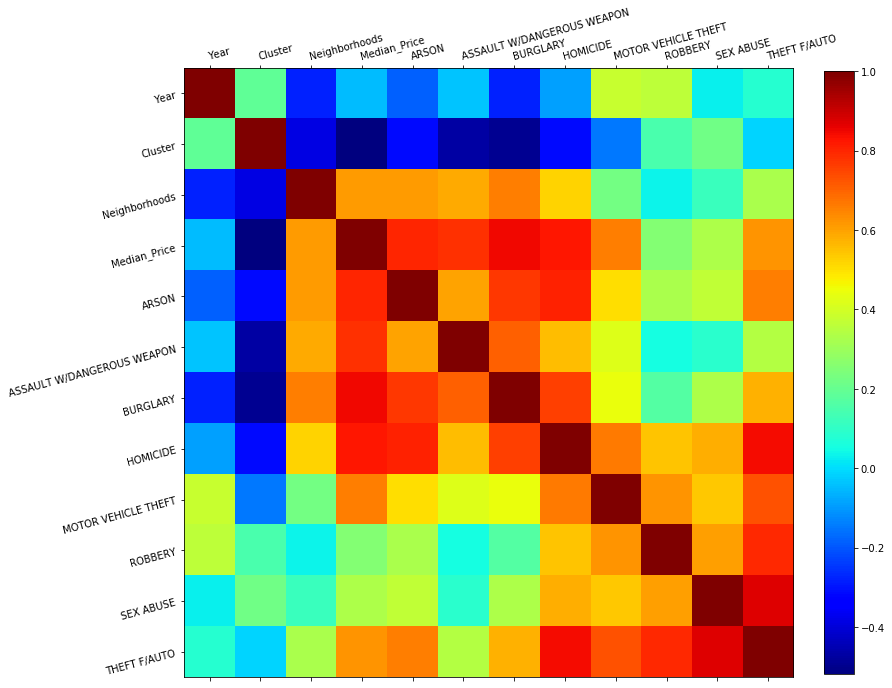

In [8]:
#Mat Show Correlation
columns = h_n_c.columns
corr_matrix = h_n_c.corr()


fig, ax = plt.subplots(figsize=(12, 12))
mat = ax.matshow(corr_matrix, cmap='jet')

ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))

ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
ax.yaxis.set_tick_params(rotation=15)
plt.setp(ax.get_xticklabels(), rotation=15, ha='left', rotation_mode='anchor')
plt.colorbar(mat, fraction=0.045, pad=0.045)


plt.imshow(corr_matrix,cmap='jet')

plt.show()




In [9]:
#Percent Change all culsters by year by crime type
h_n_c_Percent=h_n_c.groupby('Year').agg({'Median_Price':'mean', 
                                        'ARSON':'sum',
                                        "ASSAULT W/DANGEROUS WEAPON":'sum',
                                        "BURGLARY":'sum',
                                        "HOMICIDE":'sum',
                                        "MOTOR VEHICLE THEFT":'sum',
                                        "ROBBERY":'sum',
                                        "THEFT F/AUTO":'sum',
                                        "THEFT/OTHER":'sum',
                                        "All":'sum',
                                        })
h_n_c_df1=h_n_c_Percent.pct_change()
h_n_c_df=pd.DataFrame(h_n_c_df1)
h_n_c_df=h_n_c_df.reset_index()

h_n_c_df

,Year,Median_Price,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,THEFT F/AUTO,THEFT/OTHER,All
0,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,-0.067282,-0.157895,-0.201175,-0.090983,-0.267045,-0.200188,-0.144981,inf,-0.350900,-0.145111
2,2010,0.036115,-0.020833,-0.001731,0.192456,-0.031008,-0.134773,0.038188,1.098650,-0.189595,0.081524
3,2011,-0.015862,-0.085106,-0.038578,-0.053798,-0.152000,-0.124559,0.060939,0.150792,0.091957,0.048306
4,2012,0.058034,-0.209302,0.048693,-0.058436,-0.160377,-0.135462,0.067529,0.035472,0.197267,0.063246
5,2013,0.126158,0.029412,0.012038,-0.069052,0.146067,-0.061671,-0.048715,0.044119,0.064210,0.018533
6,2014,0.006117,-0.257143,0.033135,-0.054655,0.029412,0.175774,-0.177834,0.113144,0.132581,0.070268
7,2015,0.092862,-0.307692,-0.039474,-0.201398,0.495238,-0.072798,0.015804,-0.000982,-0.021866,-0.030702
8,2016,0.056026,-0.666667,-0.040240,-0.162291,-0.133758,-0.072555,-0.104027,0.073849,0.021501,0.001416


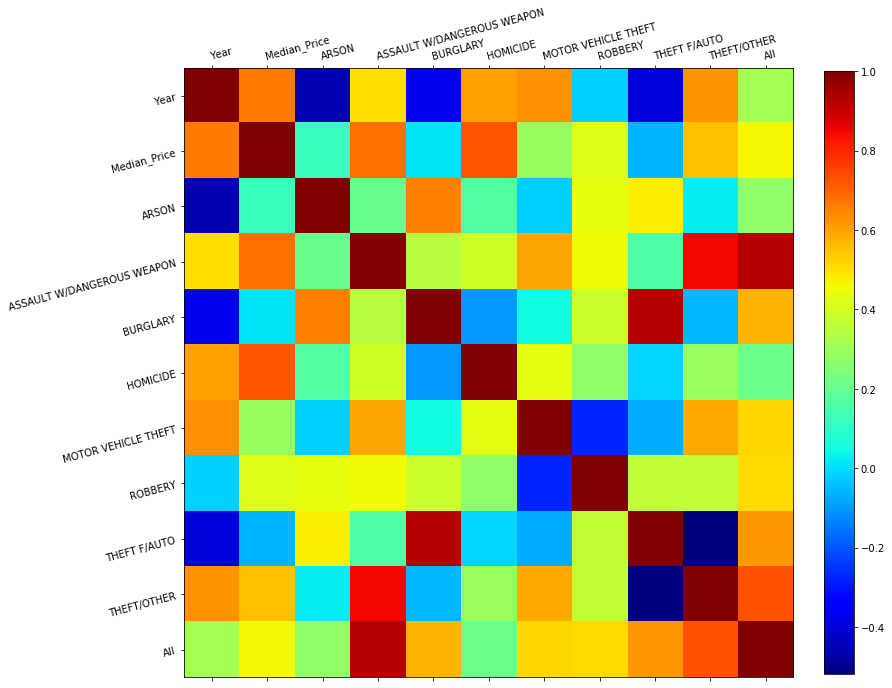

In [12]:
#Mat Show Correlation of Percent Change
columns = h_n_c_df.columns
h_n_c_df_corr = h_n_c_df.corr()


fig, ax = plt.subplots(figsize=(12, 12))
mat = ax.matshow(corr_matrix, cmap='jet')

ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))

ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
ax.yaxis.set_tick_params(rotation=15)
plt.setp(ax.get_xticklabels(), rotation=15, ha='left', rotation_mode='anchor')
plt.colorbar(mat, fraction=0.045, pad=0.045)


plt.imshow(h_n_c_df_corr,cmap='jet')

plt.show()


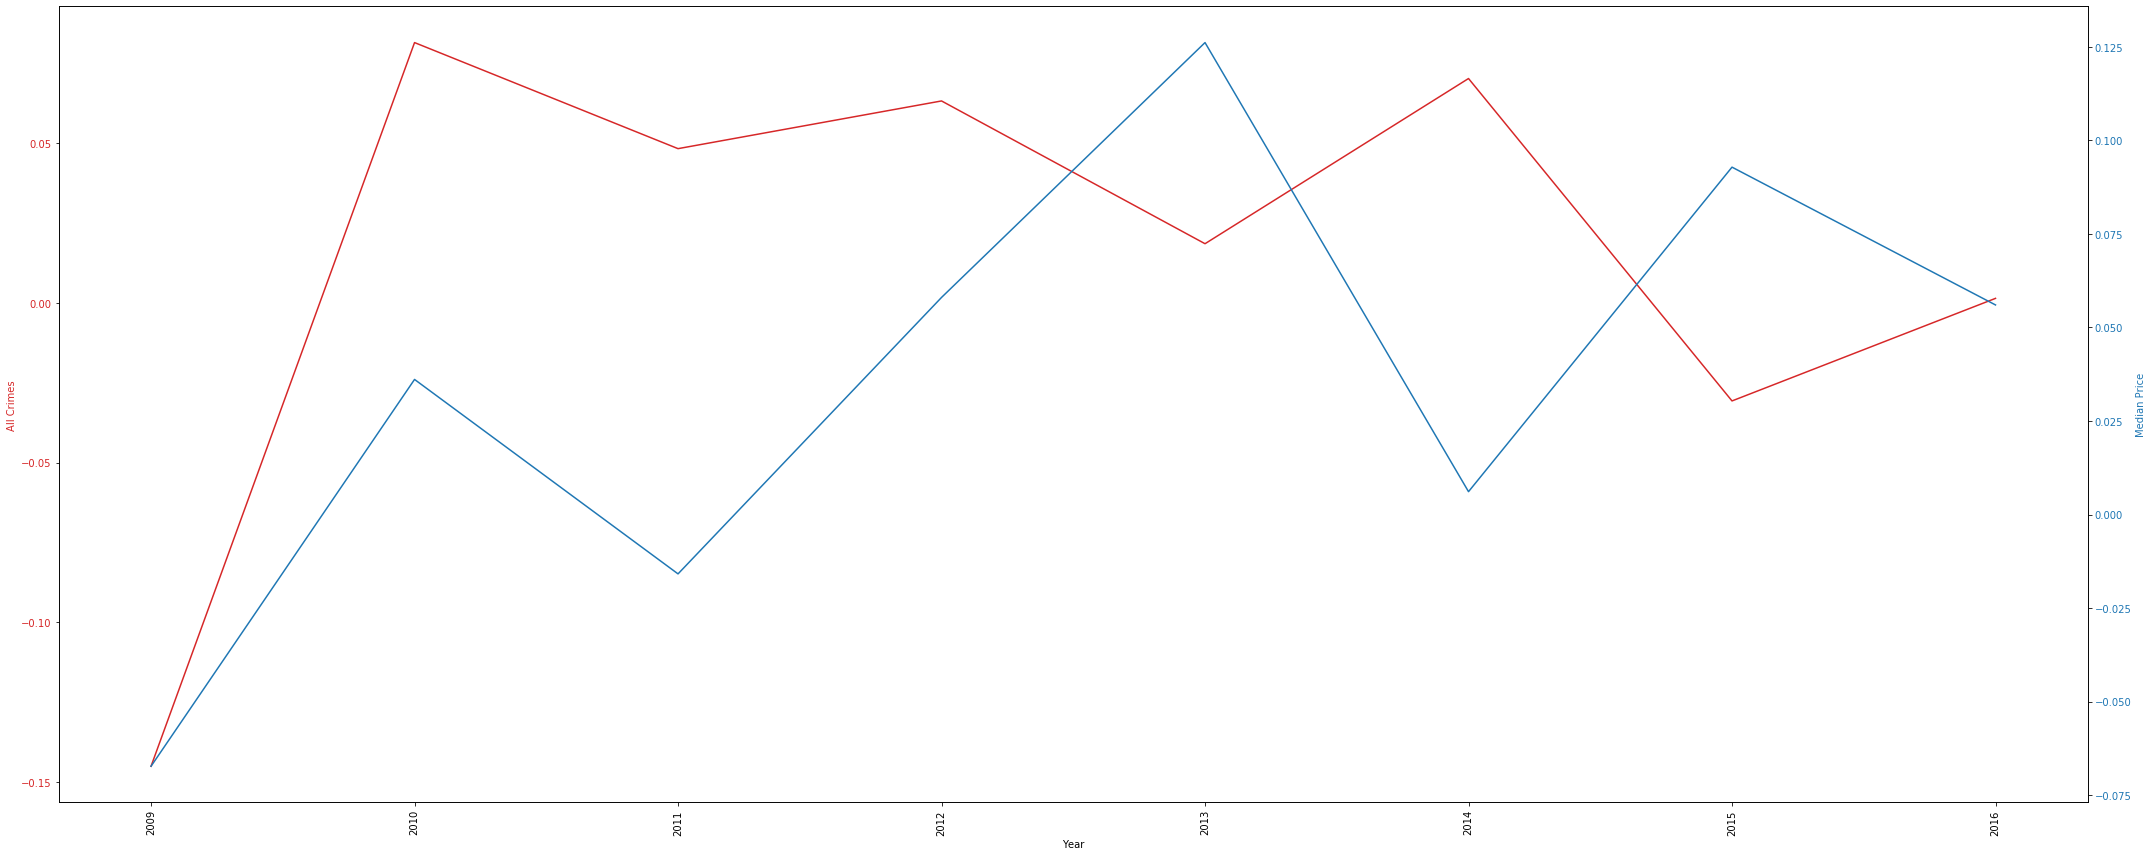

In [11]:
#Percent Change All Crimes Vs Median Price by Year

df08=h_n_c_df['Year']!=2008
h_n_c_df_shrt=h_n_c_df[df08]
h_n_c_df_shrt

fig, ax1 = plt.subplots(figsize=(30, 12))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('All Crimes', color=color)
ax1.plot(h_n_c_df_shrt['Year'], h_n_c_df_shrt['All'], color=color)
plt.xticks(rotation=90)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Median Price', color=color)  # we already handled the x-label with ax1
ax2.plot(h_n_c_df_shrt['Year'], h_n_c_df_shrt['Median_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()